In [129]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

In [130]:
# Import Iris dataset to play with
iris = datasets.load_iris()

In [131]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [132]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [133]:
# Rename the columns.
# renaming the columns
df.columns  = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [134]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [136]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [137]:
# Drop the columns where at least one element is missing.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [138]:
# Convert target_names to dictionary and add a new column.
df['species'] = df.species.replace(dict(enumerate(iris.target_names)))

In [139]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


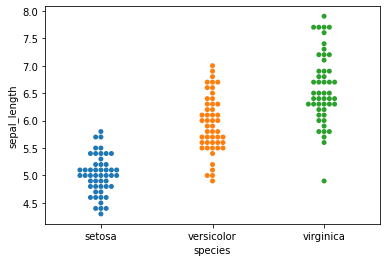

In [140]:
sns.swarmplot(x="species", y="sepal_length", data=df)

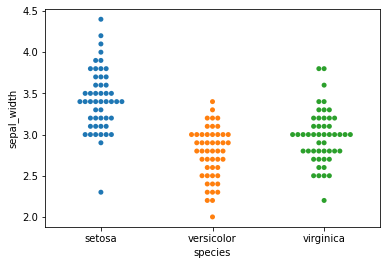

In [141]:
sns.swarmplot(x="species", y="sepal_width", data=df)

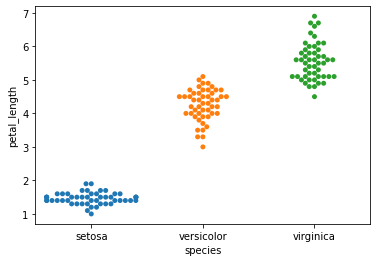

In [142]:
sns.swarmplot(x="species", y="petal_length", data=df)

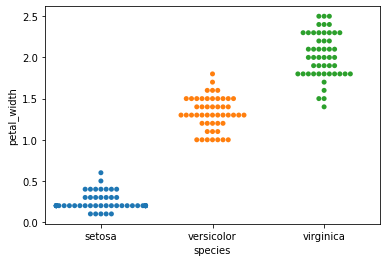

In [143]:
sns.swarmplot(x="species", y="petal_width", data=df)

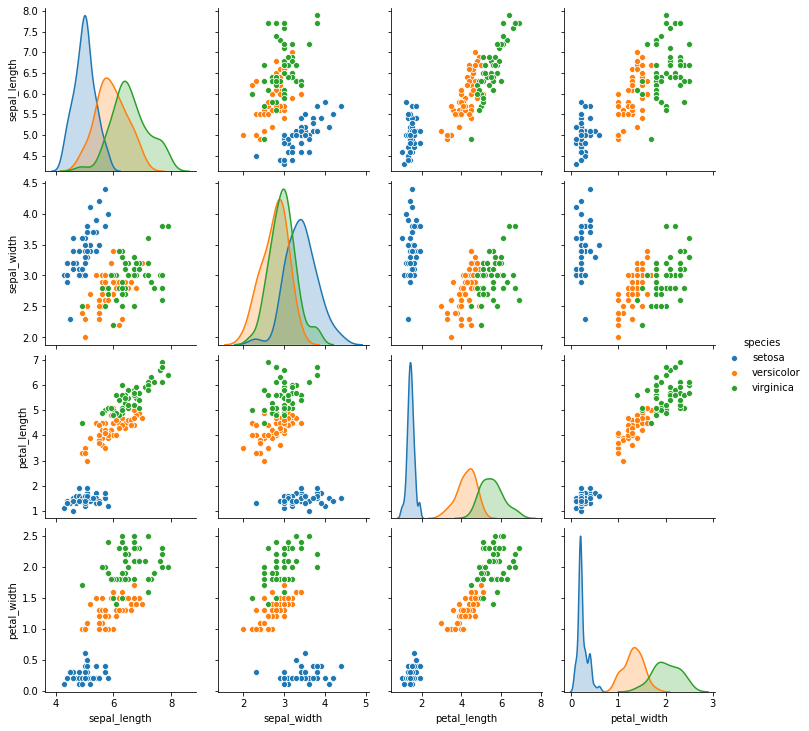

In [144]:
sns.pairplot(df, hue="species")

In [145]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### **Simple Logistic Regression**

In [146]:
final_df = df[df['species'] != 'versicolor']

In [147]:
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [148]:
final_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


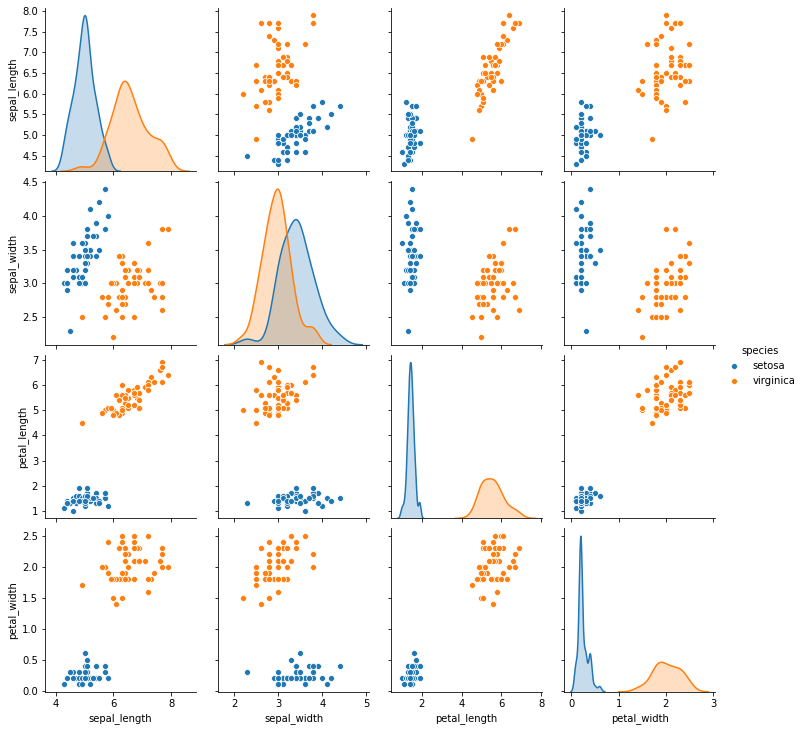

In [149]:
sns.pairplot(final_df, hue='species')

In [150]:
# Labe encoding.
final_df['species'].replace(["setosa","virginica"], [1,0], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [151]:
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [152]:
final_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,0


In [153]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)

In [154]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

In [155]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.4, random_state=7)

In [156]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [157]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.values
y_ts_arr = y_test.values

In [158]:
print(X_tr_arr.shape, X_ts_arr.shape, y_tr_arr.shape, y_ts_arr.shape)

(60, 4) (40, 4) (60, 1) (40, 1)


In [159]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [160]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [161]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    # Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    
    # Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [162]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        # weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)       
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    # final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [163]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1

    return y_pred

In [164]:
# Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

Number of Features 4


In [165]:
# Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001, no_iterations=4500)

In [166]:
# Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

Optimized weights [[-0.16734464  0.09222987 -0.18872223 -0.18198522]]
Optimized intercept -0.011917990897006427


In [167]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
y_tr_pred = predict(final_train_pred, m_tr)
y_ts_pred = predict(final_test_pred, m_ts)
print('Training Accuracy:',accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:',accuracy_score(y_ts_pred.T, y_ts_arr))

Training Accuracy: 1.0
Test Accuracy: 1.0


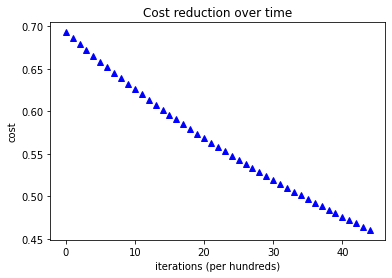

In [168]:
plt.plot(costs, 'b^')
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

### **scikit-learn Logistic Regression**

In [169]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [170]:
clf.fit(X_tr_arr, y_tr_arr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
print (clf.intercept_, clf.coef_)

[-0.20580957] [[-0.97814107  0.69178047 -1.39678222 -1.38182846]]


In [172]:
pred = clf.predict(X_ts_arr)

In [173]:
print ('Accuracy: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy: 1.0
